In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]

In [14]:
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  30<sup>th</sup> August, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [15]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [16]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- US stocks rallied this week pushing the S&P500 and NASDAQ to hit fresh records on the back of economic and trade optimism. The S&P500 in particular managed to hit all-time highs for five sessions within the past week; WTD, the S&P500 is up by 2.6%, the Dow Jones at +2% and NASDAQ gained 2.8%. Globally, South Korean tech stocks index KOSDAQ was the biggest gainer (+5.5%), followed by India (+4.4%), New Zealand & Vietnam (+3.4%). While EMs like Philippines, Russia, Chile & Malaysia were the biggest losers, down by 1-3% on the week (in USD terms). 


- The only thing that seems to slow down Technology’s remarkable momentum in this recovery has been interest rates. As you can see in charts below, upticks in the US 10 year yield have corresponded with sector rotation as Technology has briefly lost relative strength and the average stock has briefly outperformed. 


- In fact, there has been a 90% correlation year-to-date between the S&P 500 equal weight index’s relative performance (vs cap-weight S&P 500) and the US 10 year yield. Interest rates are ticking slightly higher currently and attempting to break to their highest level since June at 0.73%. If the advance can continue, the average stock is likely to see outperformance in the short term and could be set to break out to its recovery highs- which have been in place since early June when the US 10 year yield briefly spiked to 0.91%.


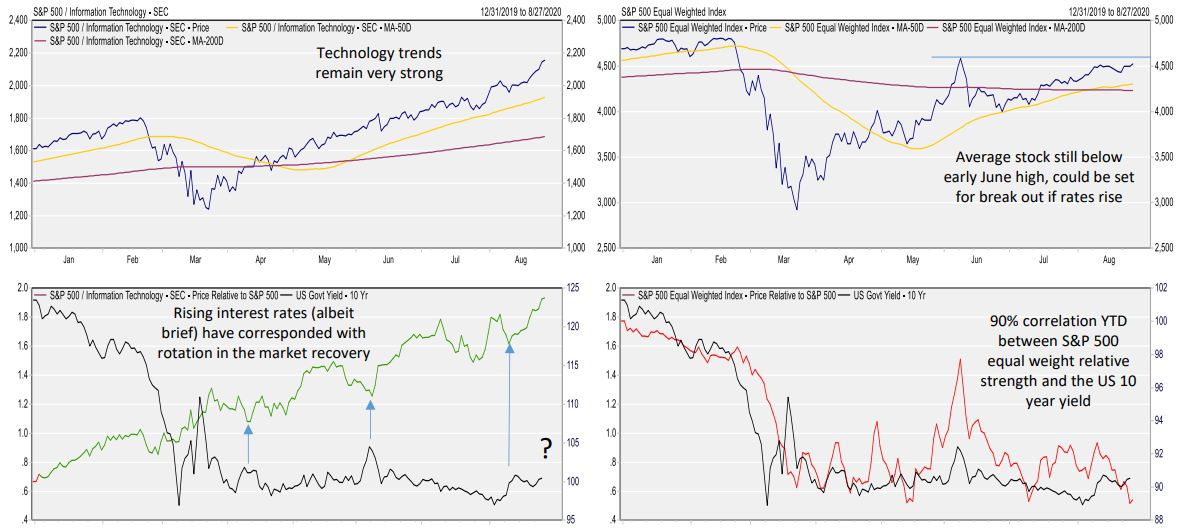


- Gap Inc. (GPS) posted a Q2 loss of USD 0.17 per share, compared to the Street's expected shortfall of USD 0.41 per share, as revenues declined 18.0% y/y to USD 3.3 billion, north of the projected $2.9 billion. GPS said same-store sales were 13.0% higher y/y, with online net sales jumping 95.0%. GPS said given the high level of uncertainty in the current environment, it is not providing fiscal year net sales or earnings outlooks at this time. The company also said as part of its ongoing fleet optimization efforts it now expects to close over 225 Gap and Banana Republic stores globally in 2020, net of openings, with additional closures expected in 2021. Shares were slightly higher.


- Workday Inc. (WDAY) announced a Q2 loss of USD 0.12 per share, or EPS of USD 0.84 ex-items, versus the expected profit of USD 0.66 per share, with revenues rising 19.6\% y/y to USD 1.1 billion, just above the projected USD 1.0 billion. The human resources and finance enterprise cloud-based applications company said it was a strong quarter despite the environment. The company noted continued demand for its products as more organizations realize how mission critical cloud-based systems are in supporting their people and businesses through continuous change. WDAY raised its full-year guidance for subscription revenue. Shares rallied over 10\%.


- Dow member Coca-Cola Company (KO) announced strategic steps to reorganize its business, which will cut its current 17 unit business structure down to 9 business units. KO said the restructuring plan will result in an undetermined number of both involuntary and voluntary job cuts. Shares traded higher.


- Jerome Powell announced the Federal Reserve’s shift in monetary policy to tolerate higher inflation (letting inflation go above 2\%), effectively abandoning its long-standing approach of premptively raising interest rates to stem rising inflation. This also signals its intention of keeping rates low for an extended period of time. Gold futures slipped 0.7\% WTD alongside higher US treasury yields. Crude oils pared gains after Hurricane Laura spared the Texas Mexico Gulf from expected oil refineries disruption.

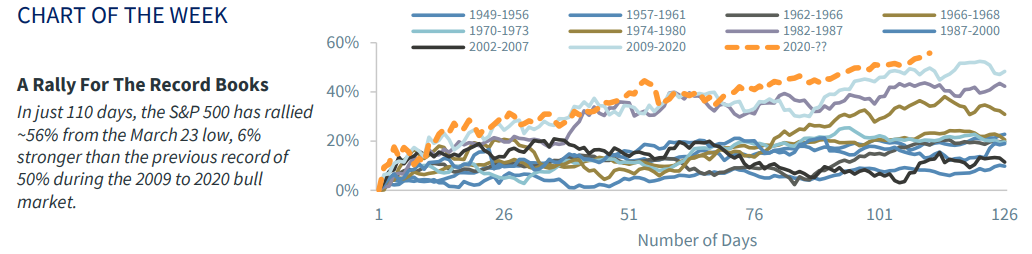

**US**

- US data were mixed –US initial jobless claims remained above 1mil last week. US GDP contracted less than initially estimated- revised from -32.9 to -31.7% QOQ. The housing sector remained a bright spot with new home sales registering double-digit growth and pending home sales increasing for the third month. This is alongside the extended gain in durable goods orders. However, consumer confidence appeared to have weakened as the Conference Board Consumer Confidence Index fell for the second month; the Chicago Fed National Index also retreated from its all-time high.


**ASIA**

- In Asia, China industrial profits soared nearly 20%, Japan data were encouraging with the all-industry index gaining for the first time in five months and machine tools orders extending recovery. Hong Kong exports fell for the 20th month; Singapore experienced easing in deflationary pressure and industrial production declined for the third month. New Zealand consumer sentiment retreated after new community outbreak.


- U.S.-China tensions over the South China Sea escalated, with Beijing firing four missiles into the waters around the same time as the Trump administration took action against Chinese companies that helped set up outposts in the disputed region. Japanese Prime Minister Shinzo Abe said he would resign to undergo treatment for a chronic illness, ending his run as the country’s longest serving premier.

**THAILAND**

- Thailand’s exports showed signs of improvement and trade indicators suggest a nascent recovery. Facebook said it’s preparing to legally challenge the Thai government’s request to block access to a private group critical of the monarchy. Thailand’s Finance Minister Predee Daochai said the economy will likely bottom out in the second half of the year and rebound in 2021. Thai government may allow foreigners who own properties in the Southeast Asian country to return.


**LEBANON**

- Lebanon suffered another inflation surge in July as the country’s financial meltdown continued. **Lebanon’s consumer prices rose an annual 112.4%**, compared with just under 90% in June, according to the Central Administration of Statistics. Inflation was below 20% as recently as in March. The United Nations Security Council is set to cut its peacekeeping mission in Lebanon following U.S. pressure.

**BRAZIL**

- Economy Minister Paulo Guedes started mulling a series of alternatives to present to the president and one possible solution would be the end of automatic, inflation-based increases to the minimum wage, according to sources Bolsonaro launched a new housing program to consolidate his popularity among the poor with an estimated cost close to 26 billion reais (\\$4.7 billion); the president also signed a decree extending benefits for companies for two more months. 


- Brazil’s consumer prices rose 0.23\% in mid-August from the previous month, led by higher transportation costs; country posted a bigger current-account surplus than expected in July on lower imports and travel abroad

**MEXICO**

- Mexico’s GDP fell 17.1\% in the second quarter compared with the three previous months, remaining on track for its worst recession in nearly a century. Inflation accelerated further beyond the target in early August and the central bank revised down its GDP forecasts. Mexican officials are divided over the scope for further rate cuts as faster inflation spooks some policy makers, according to meeting minutes. Central bank Governor Alejandro Diaz de Leon defended himself against claims by President Andres Manuel Lopez Obrador that a development bank approved a suspicious loan while he was in charge.

**DATA NEXT WEEK**

- The data calendar next week kicks off with the release of Japan retail sales and industrial production but the spotlight is likely on China’s official NBS manufacturing and non-manufacturing PMIs that would shed light on China’s most recent state of economic recovery. New Zealand’s business confidence index is also scheduled for a morning release. US data is limited to the Dallas Fed manufacturing index at night.


- On Tuesday, the RBA is expected keep its cash rate steady at 0.25%. Data are dominated by Markit Manufacturing PMIs for Japan, Malaysia, Vietnam,China, the UK, Eurozone and the US as well as US ISM manufacturing index and Australia’s AiG Performance of Manufacturing PMI. Other data include Japan jobless rate, Hong Kong retail sales, Eurozone HICP inflation and unemployment rate.
 

- Moving on to Wednesday, the highlights shall be Australia’s 2Q GDP report in the morning, followed by US ADP private payroll numbers. US mortgage applications and factory orders are also slated for the same day release. On Thursday, focus turn to Markit services PMI for Japan, UK, Eurozone and US as well as Hong Kong and Singapore private sector PMI. 


- The main data is US ISM non-manufacturing index. Eurozone retail sales, US trade report and initial jobless claims are also in the pipeline. Last but not least, Friday data include Australia and Singapore retail sales in the earlier session. US nonfarm job report is the main event at night. 

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

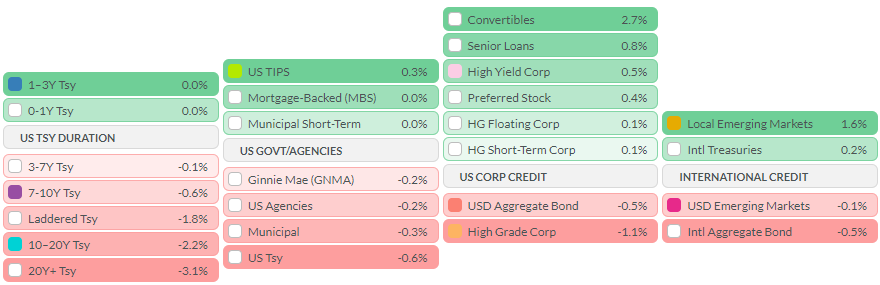

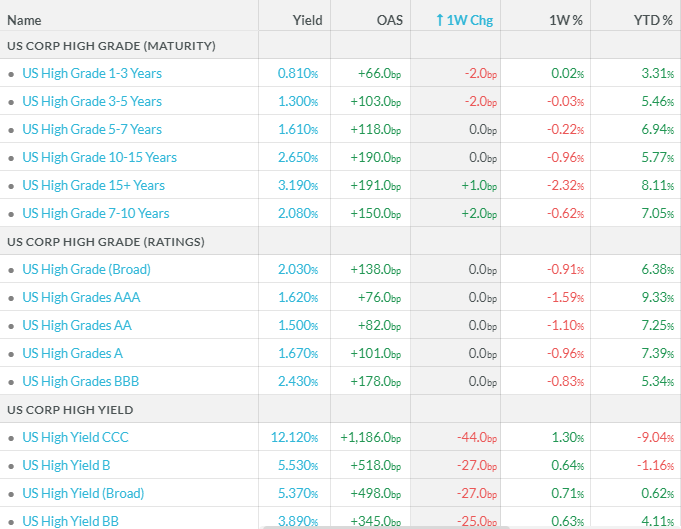

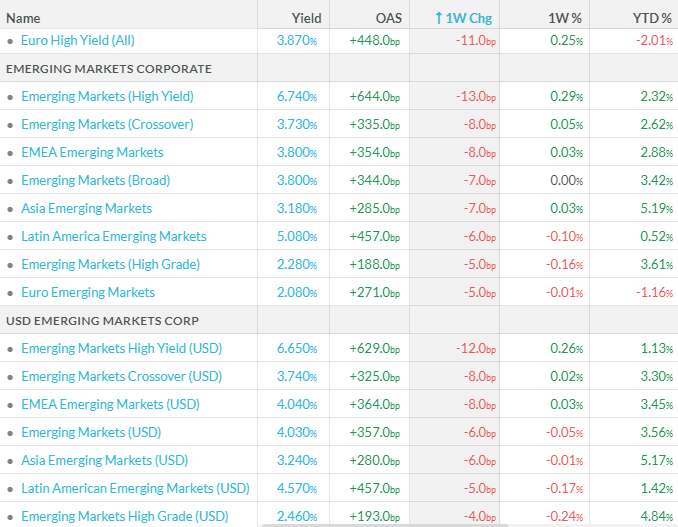

**HIGHLIGHTS:**

- US treasuries saw a reversal and came under increasing selling pressure through the week as improving risk sentiments stemming from trade optimism and vaccine hope prompted investors to pare holdings in safer government securities. Overnight, post Fed Chair Powell’s speech on shift in policy framework, UST yields jumped 6-10bps in the long bonds in the “grand finale”, rounding up the week 10-13bps higher while the 2-5s rose more modestly by 2-4bps, bear steepening the curve. Powell revealed the shift in monetary policy framework that will allow inflation to momentarily rise above 2.0%, spurring expectations for rates to stay low for longer. 


- The shift to maximum employment is also a more broad-based and inclusive goal. The 2Y benchmark ended 2bps up at 0.16% whilst the much-watched 10Y edged 10bps higher at 0.75%. The 2/10 spread rose 8bps WOW to 59bps, reflecting the steepest yield curve since early June. With key event risks out of the way, we should expect markets to shift attention towards US nonfarm payroll and other job report, as well as ISM surveys for more clues on the health of the US economy.


- On the week, with broad dollar weakness, we saw EM High Yield (USD and Local Currency) spreads compress the most (12 - 13bps), while duration underperformed, with long end (20Y+ treasuries) dropping ~3%, dragging US High Grade bonds lower as well.


- August 2020’s issuance of USD-denominated corporate bonds will total at least USD 152 billion for investmentgrade and USD 55 billion for high-yield. Both are already record highs (by a wide margin) for the month of August. Investment-grade’s erstwhile zenith was set in August 2016 at USD 121 billion, while high-yield’s former apex was the USD 33 billion of August 2012. U.S. corporate issuance -- which has hit record levels during the recent bond binge -- is pushing the U.S. swap spread curve steeper, slowly dragging the Treasuries curve in the same direction.


- The move has ramped up this week amid consistent long end paying flows in swaps linked to corporate issuance -- as bond dealers lock-in (or “rate lock”) expected yields on the debt they underwrite. This type of action has pushed the 5s30s swap-spread curve to steepest levels since the end of February, as 30-year swaps widen more than belly of the curve. This weeks paying flows have seen the mid-July to mid-August steepening trend in the Treasuries 5s30s curve rekindled. Given recent subdued cash flows and a broader lack of risk appetite, the steepening move in swap spreads may have legs to run as long as corporate issuance remains robust.

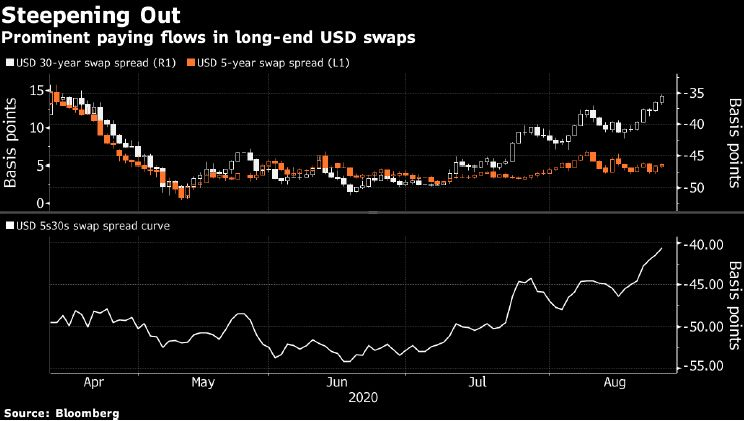




**ASIAN CENTRAL BANKS ACTION UPDATE:**


**CHINA**

- China’s banking regulator pledged its backing for Hong Kong as a finance hub The Chinese government will restrict citizens’ trips to some overseas cities and scenic spots that are on a “blacklist” of cross-border gambling. China will import USD 300 billion of semiconductors for the third straight year. Borrowing costs in China are spiking as the central bank holds back on aggressive easing. China’s economy picked up speed in August as a strong industrial sector and stock market, better business confidence and home and car sales combined to boost the first economy globally to emerge from the Covid-19 slump. China 10Y yields rose +1.6bps this week to 3.083\%.


**INDIA**

- India’s central bank saw its balance sheet increase by 12.3 trillion rupees ($167 billion), gold holding raised by 43.25 tons to 661.41 tons; it said demand in the economy is likely to take more time to mend in the absence of greater fiscal support. India 10Y yields compressed 5bps this week to 6.097%. Joblessness may be easing in India but wage growth remains subdued Business activity in India picked up in July.


**KOREA**

- Bank of Korea’s Governor Lee Ju-yeol held off from adding immediate stimulus as the central bank said it expects the economy to shrink 1.3% this year. South Korea is studying the need to raise social-distancing restrictions to the highest level The nation’s consumer confidence climbed to a six-month high in August. South Korea extended eased liquidity coverage ratio regulations for banks to end of March, while regulators extended a ban on short-selling of shares listed on some exchanges for another six months, as the nation grapples with the coronavirus outbreak.


**INDONESIA**

- Indonesia’s central bank is preparing a new regulation that will require large exporters of natural resources to convert foreign exchange earnings into rupiah. Indonesia projects third-quarter gross domestic product growth at 0% to -2%. Hundreds of Indonesian workers rallied outside parliament against legislation meant to make it easier for companies to hire and fire employees. Indonesia’s capital extended the implementation of some social distancing measures Indonesia reported a record daily surge in new coronavirus cases.

**PHILIPPINES**

- The Philippine central bank kept its key interest rate on hold; Governor Benjamin Diokno said it’s entirely possible to keep policy unchanged for the rest of the year. President Rodrigo Duterte dissociated himself from calls by his supporters to scrap the Constitution and set up a federal government. The House of Representatives approved the final version of a 165.5 billion-peso ($3.4 billion) pandemic relief bill. The Philippines plans to borrow 3.025 trillion pesos next year, two-thirds of the proposed budget.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [17]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [18]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [19]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [20]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [21]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**


- **USD:** The USD weakened against Asian currencies for the past week (21 to 27 August), although more mixed against the G10 peers. USD strengthened against JPY and EUR in particular. Overall, DXY was down 0.96% WOW (due to weightage on JPY and EUR). PMI prints were supportive on US economy, while Fed Chair Powell hinted at longer support for low US rates. Expect policy announcements to move the USD the most, followed by economic data (particularly surprise swings).



- **EUR**: EUR/USD has been in a consolidation mode for most of the week, being in a weekly range of 1.1754 to 1.1901. This comes as Eurozone PMI (51.6 vs. 54.9 prior) showed a more subdued pace of pickup in August compared to July. Despite plenty of good news being priced into EUR (the agreement on the EU Recovery Fund and the new budget led to a compression of the EZ fiscal premia) and speculative positioning being stretched, the dollar weakness dominates and is likely to be the key driver of the cross next week and for quarters  to come. With the soft USD environment in place, the risk is skewed for modestly higher EUR/USD next week.



- **GBP**: GBP was in bid tone this week. Pair moved from 1.3054 low to a high of 1.3284. PMIs were strong. alongside other currencies’ outlook. GBP will remain driven primarily by dollar movements. Brexit news (if any developments) may still shift sentiments. In his Jackson Hole presentation BoE Governor Bailey noted that negative rates were still part of the BoE’s tool box but his speech had little impact on sterling, with cable trading at a 9 month high on Friday while EUR/USD struggled to surpass last week’s top.



- **JPY**: Markets reacted to the news of the resignation of Japanese PM Abe by selling Japanese equities and buying JPY. The LDP is set to hold elections soon to elect a new president of the Party, who would then seek parliamentary approval to take over as PM until the October 2021 election. Next week may start to direct market expectations towards one or another possible successor: in these terms, investors will seek any hint on how much of Abenomics will be erased after the end of the Abe era.


- Data-wise, the Japanese economic calendar will hardly be a factor for JPY next week, with economic and political developments in the US along with dynamics in US Treasuries firmly on the driver’s seat. With a possible NFP miss on the cards and the post-Abe speculation possibly following a JPY-positive path, the yen may be a key beneficiary of additional USD weakness next week. 


- **AUD**: AUD/USD moved higher progressively over the past week. Pair reached a high of 0.7291 from a low of 0.7140. AUD benefitted from positive market sentiments, while positioning does not appear stretched yet. The key announcement will be on 1 September’s RBA policy rate decision, although no surprises are expected. Australia will also announce GDP data, which markets are expecting a contraction of around 6% QOQ SA for 2Q.


- **SGD**: SGD: Over the past week, USD/SGD traded lower, reaching a low of 1.3625 on 27 August after a high of 1.3736 on 21 August. Singapore industrial production continued in negative territory (-8.4% YOY for July), but did not adversely affect outlook. Inflation stayed subdued meanwhile (-0.4% in July). In a general dollar bear market, the SGD will likely perform in line with other currencies. Retail sales are likely to improve from double digit contractions (-28% in June), particularly from motor vehicles.


- **CNY**: CNH rallied to a 7 month high of 6.86, as China and US held the trade talks and reaffirmed their commitment to implement the Phase 1 deal. The lingering USD sell off after the Fed's dovish shift in the Jackson Hole Symposium also fueled the RMB rally. Sentiment in China stock market was positive, with Shanghai Composite returning to the 3,400 level. China Industrial Profits for July accelerated from 11.5%YoY to 19.6%YoY, the highest level since June 18. This suggested the economic recovery has been materializing to improve Chinese corporate profits.


- The PBoC net injected CNY 200bn of liquidity into the market via reverse repo operations. Onshore RMB liquidity conditions tightened modestly, with the 7 day repo rate climbing to 2.2%. In the offshore RMB market, CNH liquidity conditions were ample but the back end CNH rate extended its uptrend, with 3Y CNH CCS being paid up to a 5 month high of 2.46%.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [22]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [23]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

def comd_data(commodity):
    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
    df = pd.DataFrame(df)
    df.columns = [commodity]
    return df

df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
df.index.name='Date'

for i in range(len(comds)):
    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

df = df.ffill().dropna()
df.to_excel('comd1.xlsx')

C:\Users\Harsh\Anaconda3\lib\site-packages\investpy\commodities.py:523: Warning:

Note that the displayed commodity data can differ depending on the country. If you want to retrieve copper data from either united states or united kingdom, specify the country parameter.



In [24]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [25]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()

In [26]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [27]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h', color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**


- August turned out to be the strongest month for the broadly-exposed Bloomberg Commodity Index, since April 2016. Four consecutive months of gains have seen the index claw back most of the pandemic-driven collapse back in February and March. An unprecedented amount of central bank stimulus, rock-bottom U.S. and global interest rates, recent dollar weakness, weather worries and demand for inflation hedges are all seen as key reasons behind the current rally.



- All the major sectors traded higher on the month, with natural gas, silver, corn and RBOB gasoline leading from the front. Gold, which finished July near a record high, is one of the few recording a small loss on the month. The final week of the month saw the grain sector, which up until recently was the most shorted by speculators, record strong gains. Adverse weather in the U.S. and elsewhere has led to a downgrade of yield forecasts while strong Chinese buying of corn and soybeans has supported the demand side.

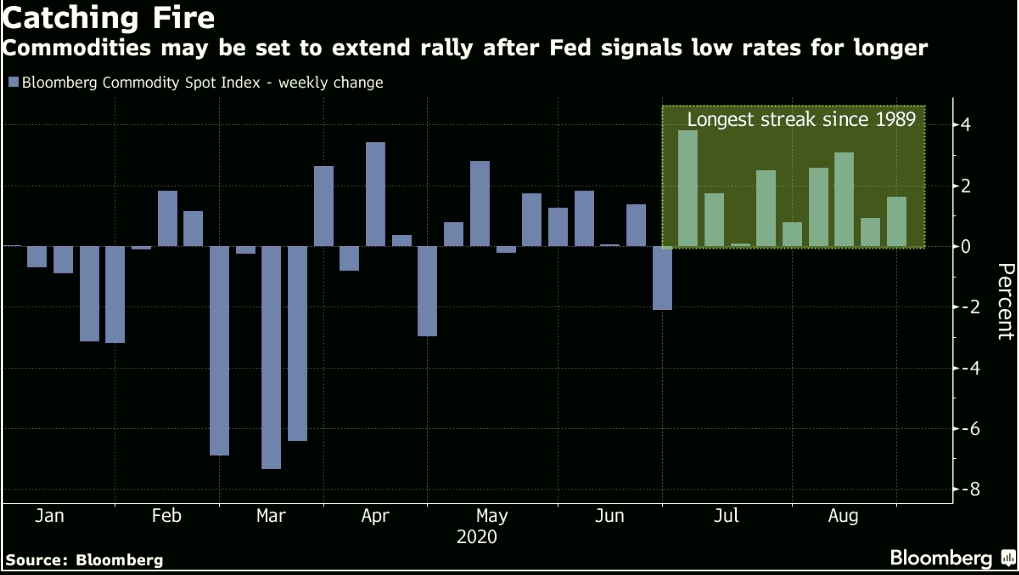

- Industrial metals also had a strong finish to the month with tight supplies in some markets, unprecedented stimulus and U.S. interest rates stuck at zero providing the support. Adding to this, economic data surprises from major consumers such as China and the U.S.


- Oil climbed to a fresh five-month high this week as Hurricane Laura bore down on oil refineries in the U.S. Gulf Coast. But the price strength has also been driven by an underlying tightening of the market, as demand recovers and the OPEC cartel keeps a lid on supplies. Next week will provide traders with another steer on the supply situation, with the release of vital tanker-tracking data and Bloomberg’s monthly survey of OPEC production on Tuesday.


- The OPEC+ alliance has promised that -- in recognition of the still-fragile market balance -- the increase in its production this month will be restrained. Saudi Arabia pledged to consume any extra output at home, while other members such as Iraq and Nigeria are being compelled to curtail supply further. The estimates published next week will show how well they kept their word, and so give a clue on how durable oil’s latest price gains will prove.

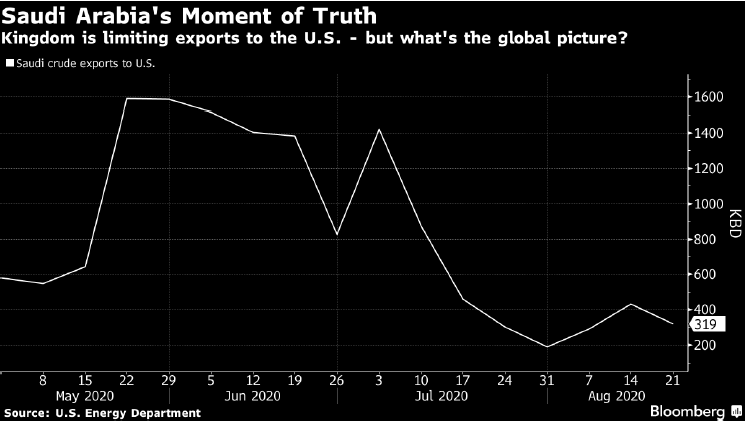


- Gold investors will be eager next week for more texture on just how the Federal Reserve plans to put its new inflation doctrine into practice, and what that’ll mean for bullion demand and prices. Fortunately there’s a crowded docket of speaking events that will likely yield greater clarity on the big shift. The precious metal rallied heading into the weekend, paring Thursday’s drop.


- With iron ore futures coming off the worst weekly loss in almost two months, investors will be on the lookout next week for further indications that tightness in the seaborne market is easing. Leading miners including BHP Group have already signaled that they expect prices of the key raw material to decline. That potentially paves the way for a retreat back toward USD 100 a ton.

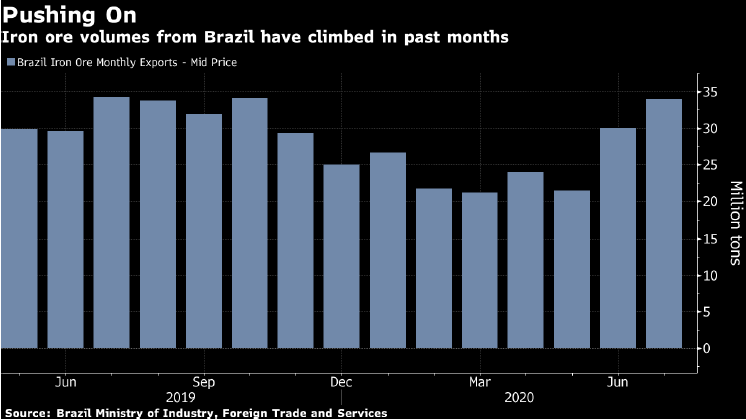



- The main insights will be carried in vessel-tracking data in AHOY DRY including cargoes from Australia’s Port Hedand, which are due midweek, as well figures for port holdings in China next Friday that may show another rise. In addition, there’ll be official export numbers from Brazil for last month that may confirm a pick-up in flows as Vale SA starts to put supply glitches behind it.

- Copper once again cleared the psychologically important USD 3/pound level on Thursday on the back of falling inventories, booming Chinese demand, and pandemic hit supply from South America, the U.S,. and Africa. Copper for delivery in December trading on the Comex in New York exchanged hands for USD 3.0120 a pound in morning trade, bringing gains for 2020 to more than 8 percent and a mouthwatering 52 percent since the COVID-19 lows struck in March.


- Total visible stocks globally, which include those on exchanges and bonded warehouses in China fell by 40 percent from March to end-July to below 600,000 tonnes. Inventories in LME warehouses are at 13-year lows (white line). China is responsible for more than half the world’s copper consumption and the country is sucking up copper at record-setting rates.

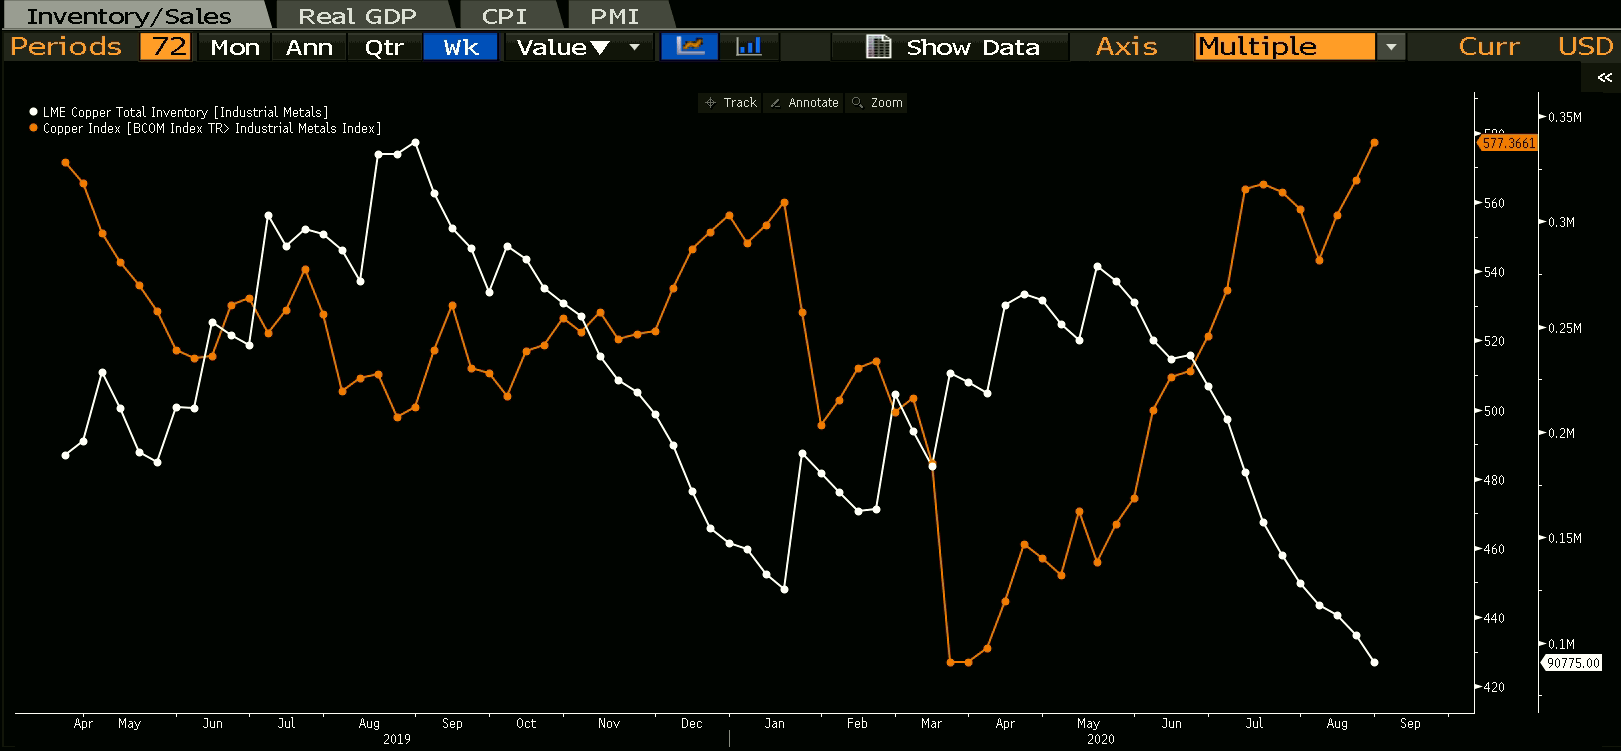

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

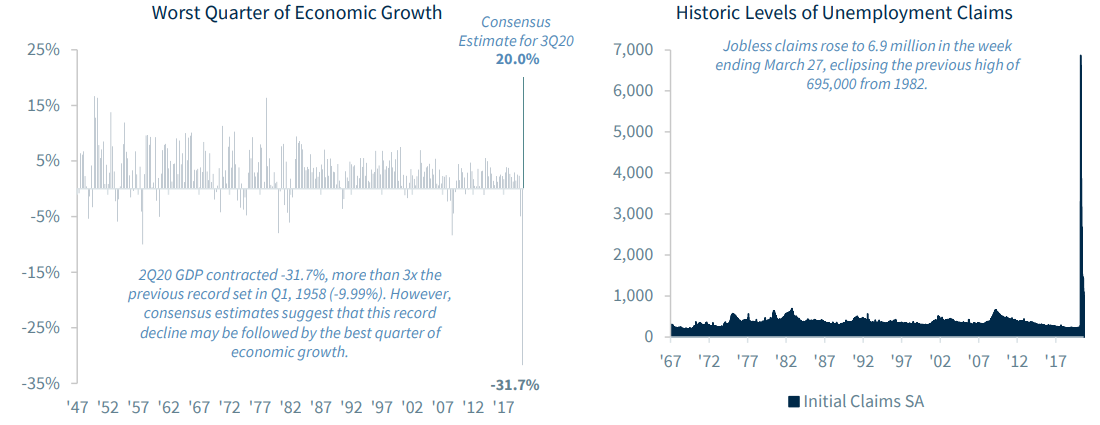

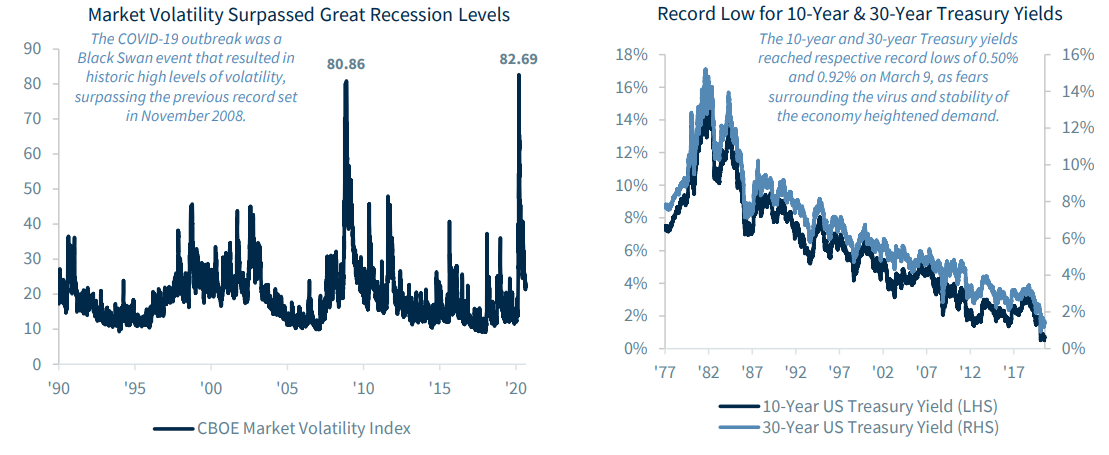

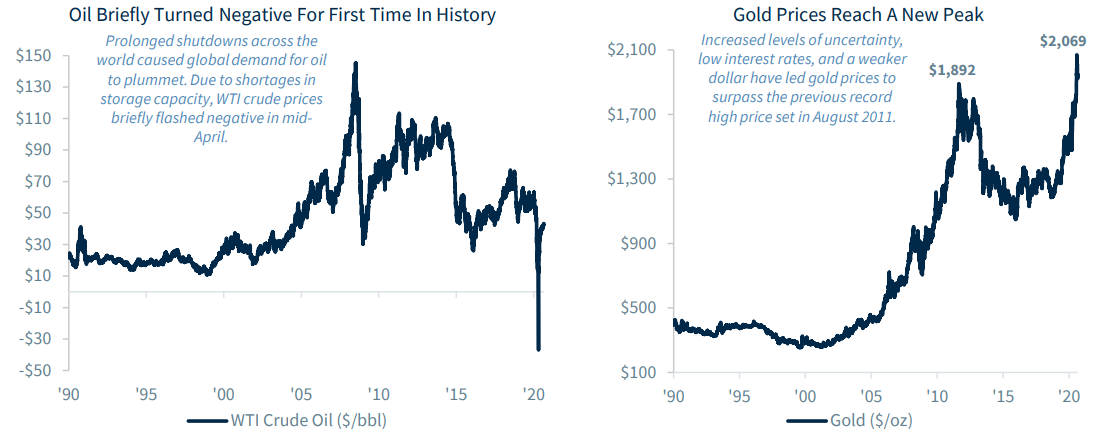

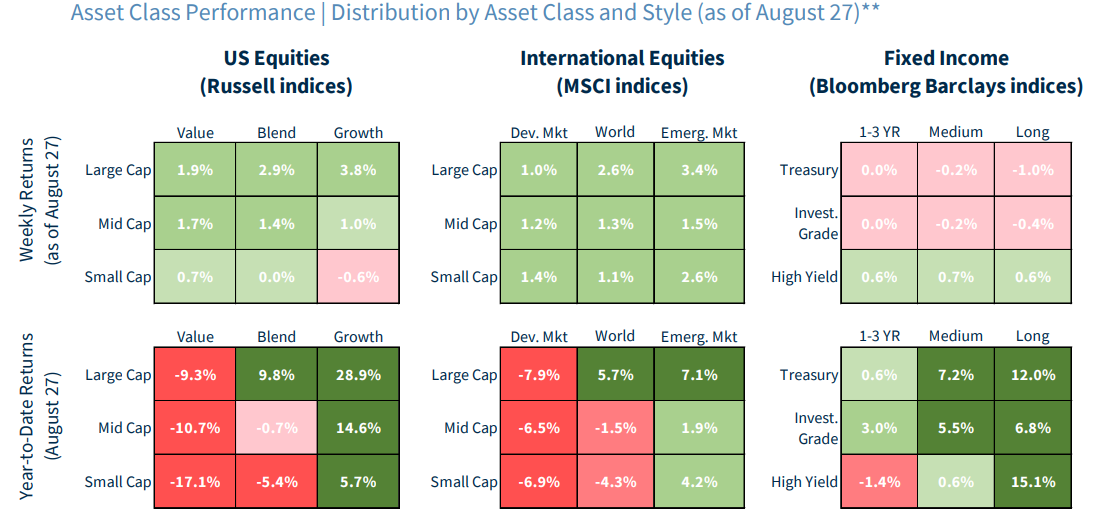

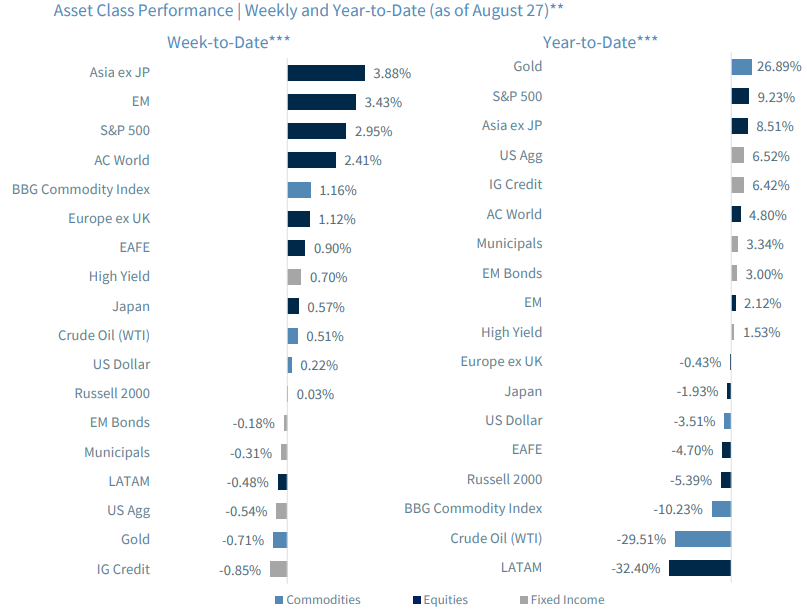

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [28]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)